## **Recognize Handwritten digits Using A Simple Neural Network in Python**

Dataset used: MNIST dataset for handwritten digit recognition

This neural network is a type of feedforward neural network, commonly used for supervised learning tasks like classification. Given its architecture and the choice of activation functions, it's suitable for solving problems where non-linear relationships need to be captured in the data, and it's specifically designed for multi-class classification tasks with 10 output classes.

In [1]:
import os
import cv2 #process image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf #ml part

mnist = tf.keras.datasets.mnist #load the MNIST dataset using TensorFlow's Keras API
(X_train,y_train), (X_test,y_test) = mnist.load_data() #loading the data

In [2]:
'''#We dont want to normalize the digits just the pixels is enough
X_train = tf.keras.utils.normalize(X_train,axis=1)
X_test = tf.keras.utils.normalize(X_test,axis=1)

In [3]:
'''model = tf.keras.models.Sequential()
#creating a sequential layer, where we can add layers as a stack one at a time. It is called sequential because we build the neural network model sequentially adding one layer after another.

1. We have one input layer
2. Two hidden layers
3. And one output layer

Softmax converts the raw outputs into probability scores.

In [4]:
'''model.add(tf.keras.layers.Flatten(input_shape=(28,28))) #flattering the input data into an array of length 28*28
model.add(tf.keras.layers.Dense(units=128,activation='relu')) #units specify the number of neurons in the dense layer
model.add(tf.keras.layers.Dense(units=128,activation='relu'))
model.add(tf.keras.layers.Dense(units=10,activation='softmax')) #last layer with 10 neurons -> output layer (0 -9), softmax is an activation funtion used for multiclass classification tasks.

In [5]:
#compile function basically set various attributes and options for the training process before actually training the model
#When you compile a model, you define how it should be optimized, what loss function to use, and what metrics to monitor during training.

#optimizer determines how the model's weights are updated during training to minimize the defined loss function
#adam: Adaptive Moment Estimation -> uses RMSprop and Momentum
#loss function: for classification problems, categorical crossentropy is mainly used
#metrics: used to evaluate the model's performance during training and testing

'''model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [6]:
'''model.fit(X_train,y_train,epochs=3) #epochs are given to specify how many times the training has to be done
model.save('handwritten.model')

Epoch 1/3
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2662 - accuracy: 0.9218
Epoch 2/3
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1085 - accuracy: 0.9669
Epoch 3/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0743 - accuracy: 0.9764


In [2]:
model = tf.keras.models.load_model('handwritten.model') #just load the model now without running the whole code

In [8]:
'''loss,accuracy =  model.evaluate(X_test,y_test)
print(loss)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0897 - accuracy: 0.9718
0.08967297524213791
0.9718000292778015


1/1 [==============================] - 0s 224ms/step
This digit is probably a 3


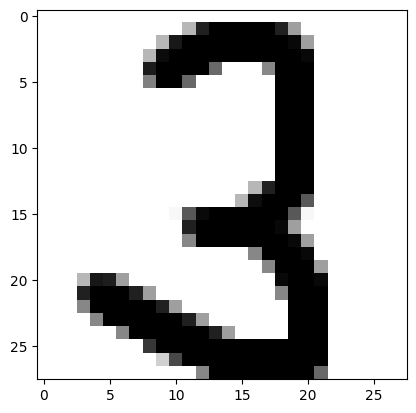

In [3]:
while os.path.isfile("/3.png"): # checks whether this file exists or not
  try:
    img=cv2.imread("/3.png")[:,:,0] #it selects only the first channel(greyscale channel) of the image. The result is a greyscale image
    #It is usually used to convert a multi-channel image (a color image with multiple color channels) into a single-channel greyscale image for further processing or analysis
    #By default it is white on black hence we have to invert the image

    img=np.invert(np.array([img])) #image in a list as a numpy array which is inverted
    #np.array([img]): converts the img variable into a NumPy array
    #np.invert(): pixel value inversion

    prediction=model.predict(img) #we're using the model to do the prediction
    print(f"This digit is probably a {np.argmax(prediction)}") #gives the index of the filed that has the highest number, i.e which neuron has the highest activation
    plt.imshow(img[0],cmap=plt.cm.binary)
    break

  except Exception as e: #probably this might fail because of a resolution error
    print(f"ERROR: {str(e)}")
